In [105]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.preprocessing import StandardScaler

In [106]:

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# polynomial regression model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [107]:
df = pd.read_csv('New_Data_WineQT.csv')
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0              7.4             0.700         0.00             1.9      0.076   
1              7.8             0.880         0.00             2.6      0.098   
2              7.8             0.760         0.04             2.3      0.092   
3             11.2             0.280         0.56             1.9      0.075   
4              7.4             0.660         0.00             1.8      0.075   
..             ...               ...          ...             ...        ...   
783            6.3             0.510         0.13             2.3      0.076   
784            6.8             0.620         0.08             1.9      0.068   
785            6.2             0.600         0.08             2.0      0.090   
786            5.9             0.550         0.10             2.2      0.062   
787            5.9             0.645         0.12             2.0      0.075   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                   11.0                  34.0  0.99780  3.51       0.56   
1                   25.0                  67.0  0.99680  3.20       0.68   
2                   15.0                  54.0  0.99700  3.26       0.65   
3                   17.0                  60.0  0.99800  3.16       0.58   
4                   13.0                  40.0  0.99780  3.51       0.56   
..                   ...                   ...      ...   ...        ...   
783                 29.0                  40.0  0.99574  3.42       0.75   
784                 28.0                  38.0  0.99651  3.42       0.82   
785                 32.0                  44.0  0.99490  3.45       0.58   
786                 39.0                  51.0  0.99512  3.52       0.76   
787                 32.0                  44.0  0.99547  3.57       0.71   

     alcohol  quality  
0        9.4        5  
1        9.8        5  
2        9.8        5  
3        9.8        6  
4        9.4        5  
..       ...      ...  
783     11.0        6  
784      9.5        6  
785     10.5        5  
786     11.2        6  
787     10.2        5  

[788 rows x 12 columns]

In [108]:
y = df['quality']
X = df.drop(['quality'],  axis = 1)

In [109]:
# bestfeatures = SelectKBest(score_func = chi2, k = 'all')
# fit = bestfeatures.fit(X, y)

In [110]:
# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(X.columns)

In [111]:
# featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
# featureScores.columns = ['Specs', 'Score']
# print(featureScores.nlargest(5, 'Score'))

**Стандартизация**

In [104]:
#features = featureScores.nlargest(13, 'Score')
#features['Specs'][5:]
features = ['residual sugar', 'fixed acidity', 'sulphates', 'chlorides', 'pH', "density", "citric acid", "volatile acidity"]

In [112]:
x_standart = df.loc[:, features].values

In [113]:
#x_standart = df.loc[:]
#x_standart = x_standart.drop('quality', axis=1).values

In [116]:
x_standart = StandardScaler().fit_transform(x_standart)
pd.DataFrame(data = x_standart, columns = features).head(877)


residual sugar  fixed acidity  sulphates  chlorides        pH   density  \
0         -0.696487      -0.509484  -0.643539  -0.192243  1.381255  0.714749   
1          0.894988      -0.256707   0.428006   1.209830 -0.897485  0.120169   
2          0.212928      -0.256707   0.160120   0.827446 -0.456438  0.239085   
3         -0.696487       1.891898  -0.464948  -0.255974 -1.191516  0.833665   
4         -0.923840      -0.509484  -0.643539  -0.255974  1.381255  0.714749   
..              ...            ...        ...        ...       ...       ...   
783        0.212928      -1.204620   1.053074  -0.192243  0.719686 -0.510086   
784       -0.696487      -0.888649   1.678142  -0.702088  0.719686 -0.052260   
785       -0.469133      -1.267815  -0.464948   0.699985  0.940209 -1.009533   
786       -0.014426      -1.457397   1.142369  -1.084471  1.454763 -0.878726   
787       -0.469133      -1.457397   0.695892  -0.255974  1.822302 -0.670623   

     citric acid  volatile acidity  
0      -1.341522          0.975857  
1      -1.341522          2.026769  
2      -1.126420          1.326161  
3       1.669908         -1.476271  
4      -1.341522          0.742321  
..           ...               ...  
783    -0.642440         -0.133439  
784    -0.911318          0.508785  
785    -0.911318          0.392017  
786    -0.803767          0.100097  
787    -0.696216          0.654745  

[788 rows x 8 columns]

**Метод главных компонент (PCA)**

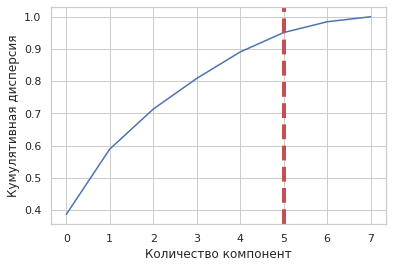

None

Cumulative Variance Ratio  Explained Variance Ratio
0                   0.386156                  0.386156
1                   0.589164                  0.203008
2                   0.713186                  0.124022
3                   0.808509                  0.095323
4                   0.890697                  0.082188
5                   0.950922                  0.060225
6                   0.984449                  0.033527
7                   1.000000                  0.015551

In [126]:
pca_test = PCA(n_components=8)
pca_test.fit(x_standart)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('Количество компонент')
plt.ylabel('Кумулятивная дисперсия')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=5, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df)

In [128]:
pca = PCA(n_components = 6)

principalComponents = pca.fit_transform(x_standart)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6'])

principalDf.head(877)

pc1       pc2       pc3       pc4       pc5       pc6
0   -1.730531  1.116018  0.225483  0.127285  0.557093 -1.279179
1   -0.299948  2.257610  0.311612  0.577320  0.918029  1.641056
2   -0.455320  1.545376  0.079803  0.596776  0.662752  0.769900
3    2.622167 -1.115010 -1.468426 -0.134755 -0.139158 -1.006938
4   -1.743118  0.880080  0.126203  0.218061  0.515784 -1.419618
..        ...       ...       ...       ...       ...       ...
783 -1.179658 -0.530358  1.306257  0.239054 -0.016724  0.480737
784 -1.332839 -0.667118  1.235610  0.677198  1.335010  0.028080
785 -2.022387  0.408763  0.091154  0.705356 -0.766238  0.232210
786 -2.103453 -1.013615  1.565163 -0.188519  0.375809  0.182826
787 -2.288053 -0.248393  1.309199  0.482038  0.159881 -0.248800

[788 rows x 6 columns]

Множественная линейная регрессия

In [129]:
X_train, X_test, y_train, y_test = train_test_split(principalDf, y, test_size = 0.2, random_state=9)
lin_reg_mod = LinearRegression()
lin_reg_mod.fit(X_train, y_train)
LinearRegression()
pred = lin_reg_mod.predict(X_test)
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))

test_set_r2 = r2_score(y_test, pred)

print(test_set_rmse)
print(test_set_r2)

0.6729718345980108
0.23757683088478854


Множественная полиномиальная регрессия

In [130]:
X_train, X_test, y_train, y_test = train_test_split(principalDf, y, test_size = 0.2, random_state=9)

poly_reg = PolynomialFeatures(degree=1)

X_poly = poly_reg.fit_transform(X_train)

lin_reg_mod = LinearRegression()
lin_reg_mod.fit(X_poly, y_train)

LinearRegression()

X_poly_test = poly_reg.fit_transform(X_test)

pred_poly = lin_reg_mod.predict(X_poly_test)

pred_table = X_test

test_set_r2 = r2_score(y_test, pred_poly)
print(test_set_r2)

0.23757683088478876


In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=9)

poly_reg = PolynomialFeatures(degree=1)

X_poly = poly_reg.fit_transform(X_train)

lin_reg_mod = LinearRegression()
lin_reg_mod.fit(X_poly, y_train)

LinearRegression()

X_poly_test = poly_reg.fit_transform(X_test)

pred_poly = lin_reg_mod.predict(X_poly_test)

pred_table = X_test

test_set_r2 = r2_score(y_test, pred_poly)
print(test_set_r2)

0.30616102686781743


# **Анализ независимых компонент (ICA)**

In [139]:
ica = FastICA(n_components=9)
X_ica = ica.fit_transform(X)

Множественная линейная регрессия

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X_ica, y, test_size = 0.2, random_state=9)
lin_reg_mod = LinearRegression()
lin_reg_mod.fit(X_train, y_train)
LinearRegression()
pred = lin_reg_mod.predict(X_test)
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))

test_set_r2 = r2_score(y_test, pred)

print(test_set_rmse)

print("R2 ", test_set_r2)

0.6355275019802046
R2  0.3200593487812976


Множественная полиномиальная регрессия

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X_ica, y, test_size = 0.2, random_state=9)

poly_reg = PolynomialFeatures(degree=1)

X_poly = poly_reg.fit_transform(X_train)

lin_reg_mod = LinearRegression()
lin_reg_mod.fit(X_poly, y_train)

LinearRegression()

X_poly_test = poly_reg.fit_transform(X_test)

pred_poly = lin_reg_mod.predict(X_poly_test)

pred_table = X_test

test_set_r2 = r2_score(y_test, pred_poly)
print(test_set_r2)

0.32005934878129705
